In [101]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

In [3]:
root = "env/"

In [181]:
envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 10


In [182]:
envs.remove(test_env)
train_env=envs
train_env

[5, 6, 8, 9]

In [183]:
test_env

10

In [184]:
test_root = root + str(test_env) + "/random/"
testing_data = pd.read_csv(test_root + "feature.csv", header=None)

In [185]:
testing_data

,0,1,2,3,4,5,6,7,8,9
0,2019-05-01 18:46:00.096,-3.097473,-10.767303,-1.083923,126.704043,-4.982900,5.109607,-95.748488,-164.027431,bed
1,2019-05-01 18:46:00.106,-3.054794,-10.637909,-0.741684,123.046971,-4.811462,5.176701,-93.988256,-164.014806,bed
2,2019-05-01 18:46:00.116,-3.009644,-10.026596,-0.239853,109.648111,-4.425364,5.044629,-91.370349,-163.296541,bed
3,2019-05-01 18:46:00.126,-3.090469,-9.176529,0.185333,93.794034,-4.027222,4.750710,-88.842986,-18.608951,bed
4,2019-05-01 18:46:00.136,-3.253876,-8.475861,0.507477,82.685459,-3.740753,4.511416,-86.573610,-20.967476,bed
5,2019-05-01 18:46:00.146,-3.478714,-8.168366,0.625443,79.214824,-3.673879,4.400151,-85.621470,-23.007700,bed
6,2019-05-01 18:46:00.156,-3.717224,-8.347305,0.560028,83.808887,-3.834834,4.454831,-86.161727,-23.956602,bed
7,2019-05-01 18:46:00.166,-3.990890,-8.822525,0.250122,93.826715,-4.187764,4.539526,-88.376077,-24.331091,bed
8,2019-05-01 18:46:00.176,-4.268341,-9.547211,-0.140213,109.387632,-4.651922,4.715215,-90.841401,-155.913969,bed
9,2019-05-01 18:46:00.186,-4.412765,-10.234970,-0.394882,124.383042,-5.014206,4.947538,-92.209471,-156.692396,bed


In [186]:
testing_labels = testing_data.ix[:,9]
testing_data = testing_data.drop(testing_data.columns[9], axis = 1)
testing_data = testing_data.drop(testing_data.columns[0], axis = 1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [187]:
testing_data.head()

,1,2,3,4,5,6,7,8
0,-3.097473,-10.767303,-1.083923,126.704043,-4.982900,5.109607,-95.748488,-164.027431
1,-3.054794,-10.637909,-0.741684,123.046971,-4.811462,5.176701,-93.988256,-164.014806
2,-3.009644,-10.026596,-0.239853,109.648111,-4.425364,5.044629,-91.370349,-163.296541
3,-3.090469,-9.176529,0.185333,93.794034,-4.027222,4.750710,-88.842986,-18.608951
4,-3.253876,-8.475861,0.507477,82.685459,-3.740753,4.511416,-86.573610,-20.967476


In [188]:
training_data = pd.DataFrame()
for envs in train_env:
    df_data = pd.read_csv(root + str(envs) + "/random/" + "feature.csv", header=None)
    training_data = training_data.append(df_data,ignore_index=True)

In [189]:
training_data

,0,1,2,3,4,5,6,7,8,9
0,2019-05-01 17:09:30.002,-6.151932,13.094650,1.423096,211.341327,2.788605,9.695679,83.797572,-25.035159,bed
1,2019-05-01 17:09:30.012,-6.264893,11.719070,1.199951,178.025364,2.218043,9.035104,84.153686,-28.004448,bed
2,2019-05-01 17:09:30.022,-5.984146,10.910080,1.254120,156.412666,2.060018,8.475897,83.442599,-28.586350,bed
3,2019-05-01 17:09:30.032,-5.659958,10.463760,1.623474,144.161066,2.142425,8.074376,81.180758,-28.125186,bed
4,2019-05-01 17:09:30.042,-5.387619,10.331375,2.081268,140.095426,2.341675,7.862732,78.610138,-27.076633,bed
5,2019-05-01 17:09:30.052,-5.226623,10.531570,2.466446,144.314916,2.590464,7.879829,76.819140,-25.790161,bed
6,2019-05-01 17:09:30.062,-5.021484,10.733017,2.747223,147.960194,2.819585,7.877500,75.642815,-24.382043,bed
7,2019-05-01 17:09:30.072,-4.749130,10.817200,2.914230,148.058792,2.994100,7.783472,74.922093,-22.973079,bed
8,2019-05-01 17:09:30.082,-4.675293,10.480591,2.813843,139.618864,2.873047,7.578115,74.971558,-23.307975,bed
9,2019-05-01 17:09:30.092,-4.746704,9.407532,2.368027,116.640408,2.342952,7.077151,75.871256,-26.072549,bed


In [190]:
training_labels = training_data.ix[:,9]
training_data = training_data.drop(training_data.columns[9], axis = 1)
training_data = training_data.drop(training_data.columns[0], axis = 1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [191]:
training_data

,1,2,3,4,5,6,7,8
0,-6.151932,13.094650,1.423096,211.341327,2.788605,9.695679,83.797572,-25.035159
1,-6.264893,11.719070,1.199951,178.025364,2.218043,9.035104,84.153686,-28.004448
2,-5.984146,10.910080,1.254120,156.412666,2.060018,8.475897,83.442599,-28.586350
3,-5.659958,10.463760,1.623474,144.161066,2.142425,8.074376,81.180758,-28.125186
4,-5.387619,10.331375,2.081268,140.095426,2.341675,7.862732,78.610138,-27.076633
5,-5.226623,10.531570,2.466446,144.314916,2.590464,7.879829,76.819140,-25.790161
6,-5.021484,10.733017,2.747223,147.960194,2.819585,7.877500,75.642815,-24.382043
7,-4.749130,10.817200,2.914230,148.058792,2.994100,7.783472,74.922093,-22.973079
8,-4.675293,10.480591,2.813843,139.618864,2.873047,7.578115,74.971558,-23.307975
9,-4.746704,9.407532,2.368027,116.640408,2.342952,7.077151,75.871256,-26.072549


In [192]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(training_data, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [193]:
# Actual class predictions
rf_predictions = model.predict(testing_data)
# Probabilities for each class
rf_probs = model.predict_proba(testing_data)[:, 1]

In [194]:
rf_predictions

array(['kit', 'kit', 'kit', ..., 'kit', 'kit', 'kit'], dtype=object)

,str,din,bat,bed,kit
str,1450,1325,390,462,412
din,583,2169,1489,1243,1047
bat,407,1106,1235,813,700
bed,323,482,763,1597,397
kit,606,980,797,1168,1736


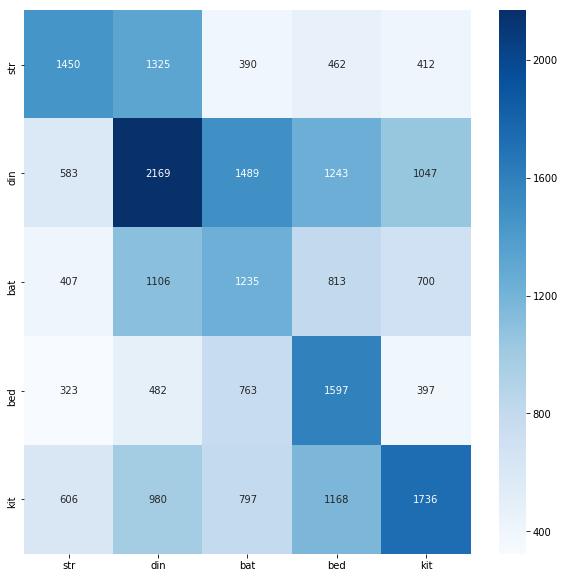

In [195]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testing_labels, rf_predictions)

df_cm = pd.DataFrame(CM, index = [i for i in set(testing_labels)],
                  columns = [i for i in set(testing_labels)])

display(df_cm)

# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10, 10))
seaborn.heatmap(df_cm,cmap='Blues',annot=True,fmt='g')
plt.savefig(test_root+"confusion_mat.png")
plt.show()

In [196]:
mac_avg_prf = pd.DataFrame(precision_recall_fscore_support(testing_labels, rf_predictions, average='macro'),index=["precision","recall","f-measure","support"])

In [197]:
df_cm.to_csv(test_root+"confusion_mat.csv")

In [198]:
mac_avg_prf.to_csv(test_root+"mac_avg_prf.csv", header=None)